In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

import sklearn as sk
from tensorflow import keras
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import random

In [ ]:
# The usecols parameter in the pandas.read_csv() function is used to specify a subset of columns to be read from a CSV file into a DataFrame.
# This parameter allows for selective loading of data, which can be beneficial for efficiency and memory management,
# especially with large datasets.

# Using pd.read_csv() function to return a pandas DataFrame object and also using usecols parameter
df = pd.read_csv("wine-reviews.csv", usecols = ["country", "description", "points", "price", "variety", "winery"])
df.head(5)

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [ ]:
# Using df.dropna() method of Pandas DataFrame class using subset Parameter
df.dropna(subset= ["description", "points"], inplace = True)

In [ ]:
df.head(5)

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [ ]:
print(df["points"])
print(type(df["points"]))

0         87
1         87
2         87
3         87
4         87
          ..
129966    90
129967    90
129968    90
129969    90
129970    90
Name: points, Length: 129971, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
# Checking the difference between df.points and df["points"]
print(df.points)
print(type(df.points))

0         87
1         87
2         87
3         87
4         87
          ..
129966    90
129967    90
129968    90
129969    90
129970    90
Name: points, Length: 129971, dtype: int64
<class 'pandas.core.series.Series'>


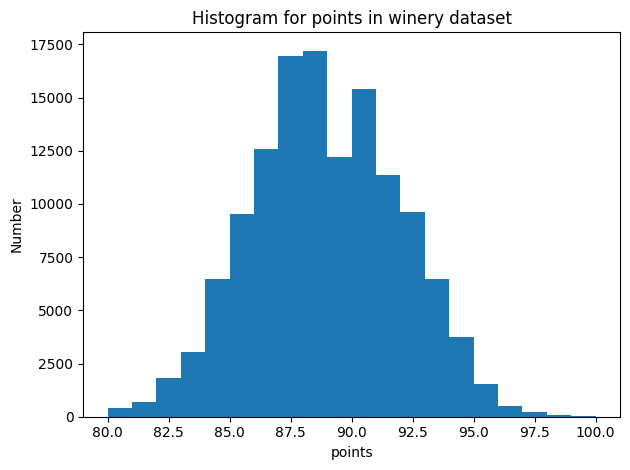

In [ ]:
# Let's use matplotlib plt.hist() function to understand the distribution of points in the above DataFrame object
plt.hist(df.points, bins = 20)
plt.xlabel("points")
plt.ylabel("Number")
plt.title("Histogram for points in winery dataset")
plt.tight_layout()
plt.show()

# Using NN for Binary Classification on diabities.csv dataset

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
# Learning about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(df.shape)

(768, 9)


In [ ]:
# Checking the number of diabetes and non-diabetes patients
len(df.loc[df["Outcome" ]== 1, ["Pregnancies"]]), len(df.loc[df["Outcome"] == 0]) # We can take out Pregnancies too I am just checking.

(268, 500)

# Visualizing data with the help of histogram

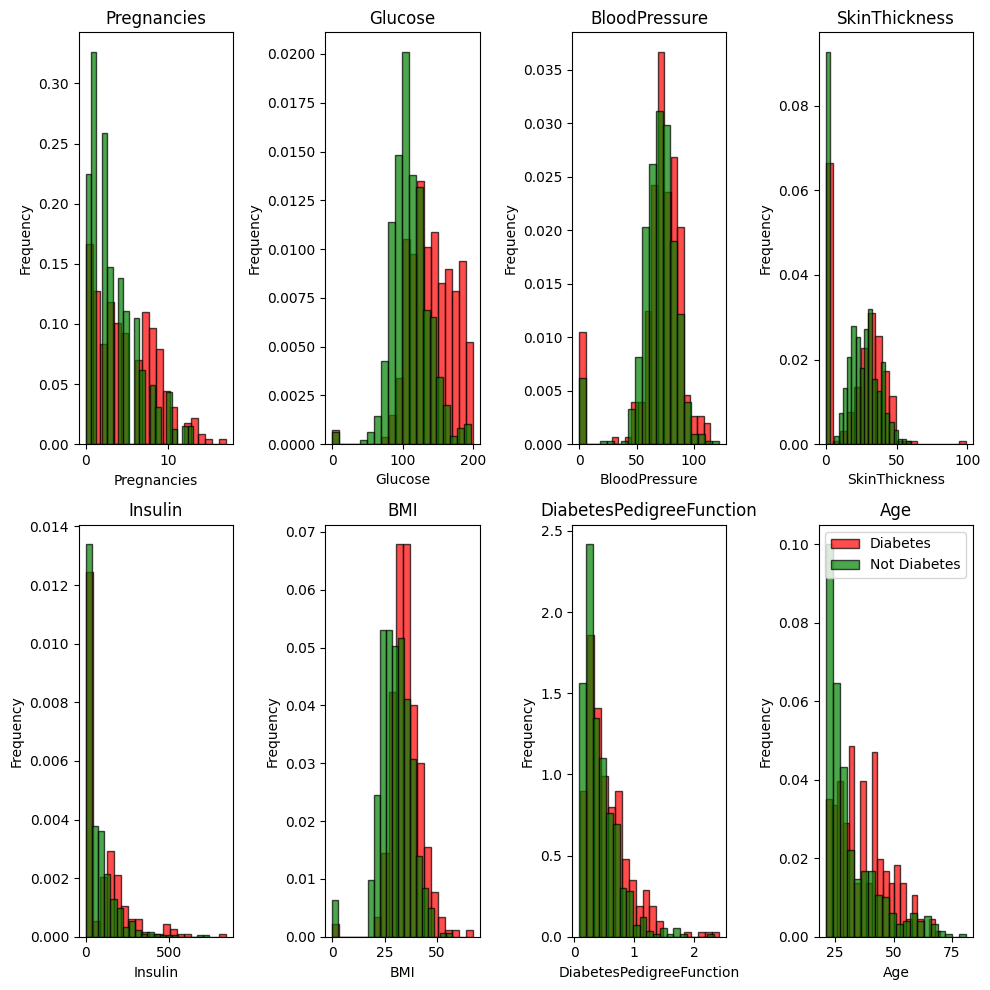

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(10, 10))

for i in range(len(df.columns[:-1])):
    row, col = divmod(i, 4)  # 4 columns per row
    feature = df.columns[i]

    # Plot histograms for Outcome = 1 and Outcome = 0
    ax[row, col].hist(df[df["Outcome"] == 1][feature],
                      bins=20, color='red', edgecolor='black', label="Diabetes", alpha = 0.7, density = True)
    ax[row, col].hist(df[df["Outcome"] == 0][feature],
                      bins=20, color='green', edgecolor='black', label="Not Diabetes", alpha = 0.7, density = True)

    # Set titles and labels correctly
    ax[row, col].set_title(feature)
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel("Frequency")

# Adjust layout and show legend
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
# Both produces the same result
# df["Pregnancies"][df["Outcome"] == 1], df[df["Outcome"] == 1]["Pregnancies"]

<class 'numpy.ndarray'>
(2, 4)
<class 'numpy.ndarray'>
(8,)
<class 'matplotlib.figure.Figure'>


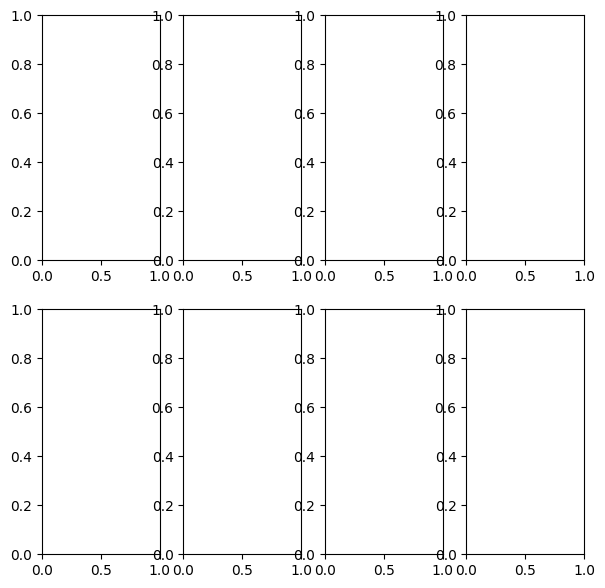

In [ ]:
# Workings / Checking
# quotient, remainder = divmod(8, 3)
# print(quotient, remainder)
figure, axes = plt.subplots(2, 4, figsize = (7, 7))
print(type(axes))
print(axes.shape)
axes = axes.ravel()
print(type(axes))
print(axes.shape)
print(type(figure))

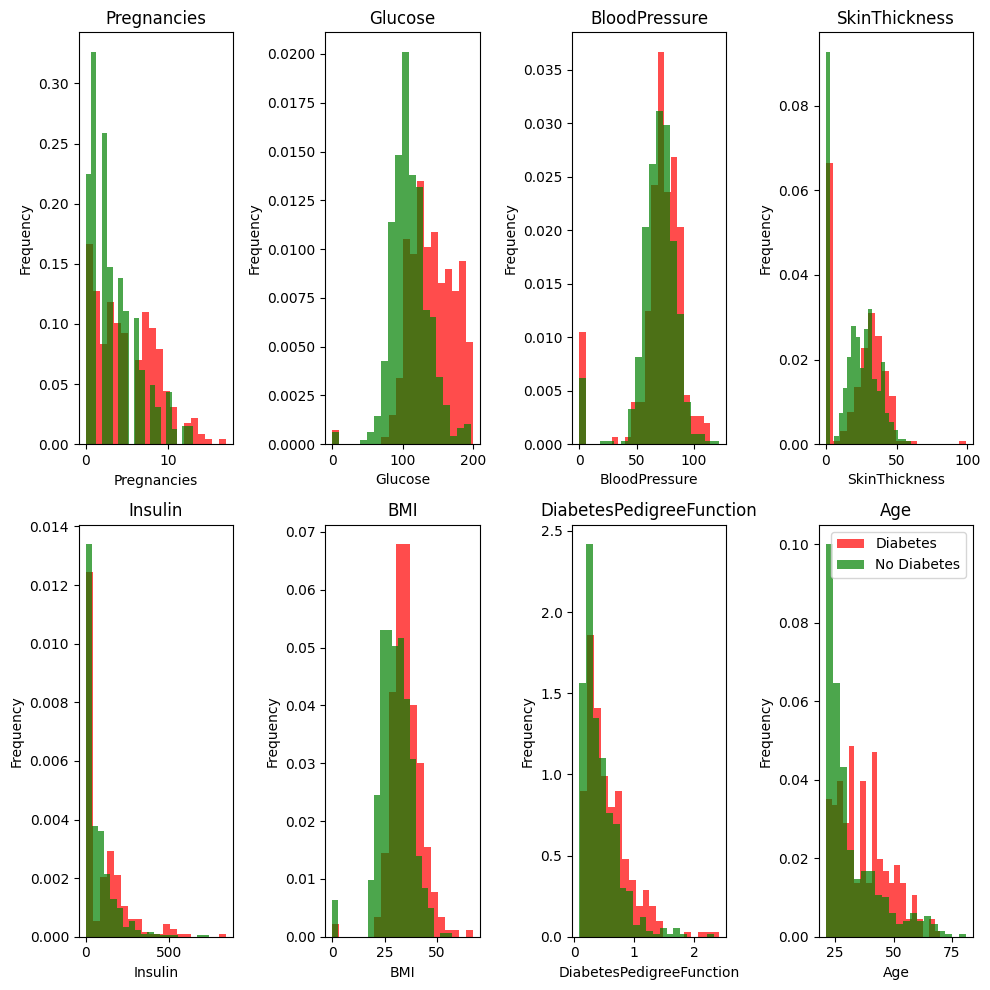

In [ ]:
# Another method for histogram
import matplotlib.pyplot as plt

# 2 rows x 4 columns of subplots
fig, ax = plt.subplots(2, 4, figsize=(10, 10))

# Flatten the axes array for easier indexing
ax = ax.ravel()

# Loop through each column except the last one (Outcome)
for i in range(len(df.columns[:-1])):
    col = df.columns[i]

    # Plot histogram for the current column
    ax[i].hist(df[df["Outcome"]== 1][col], bins=20, color='red', label = "Diabetes", alpha = 0.7, density = True)
    ax[i].hist(df[df["Outcome" ]== 0][col], bins=20, color='green', label = "No Diabetes", alpha = 0.7, density = True)
    ax[i].set_title(col)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Creating X (feature set) and y (target set)
X = df[df.columns[:-1]].values # It returns a numpy array.
y = df[df.columns[-1]].to_numpy() # Here, values and to_numpy works same but to_numpy() is recommended.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 0)

# Creating a NN for Binary Classifiation

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.Input(shape = (8,), name = "Input"),
    tf.keras.layers.Dense(16, activation = "relu", name = "Hidden_1"),
    tf.keras.layers.Dense(16, activation = "relu", name = "Hidden_2"),
    tf.keras.layers.Dense(1, activation = "sigmoid", name = "Output") # For binary classification we use sigmoid.
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Summary of the model
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

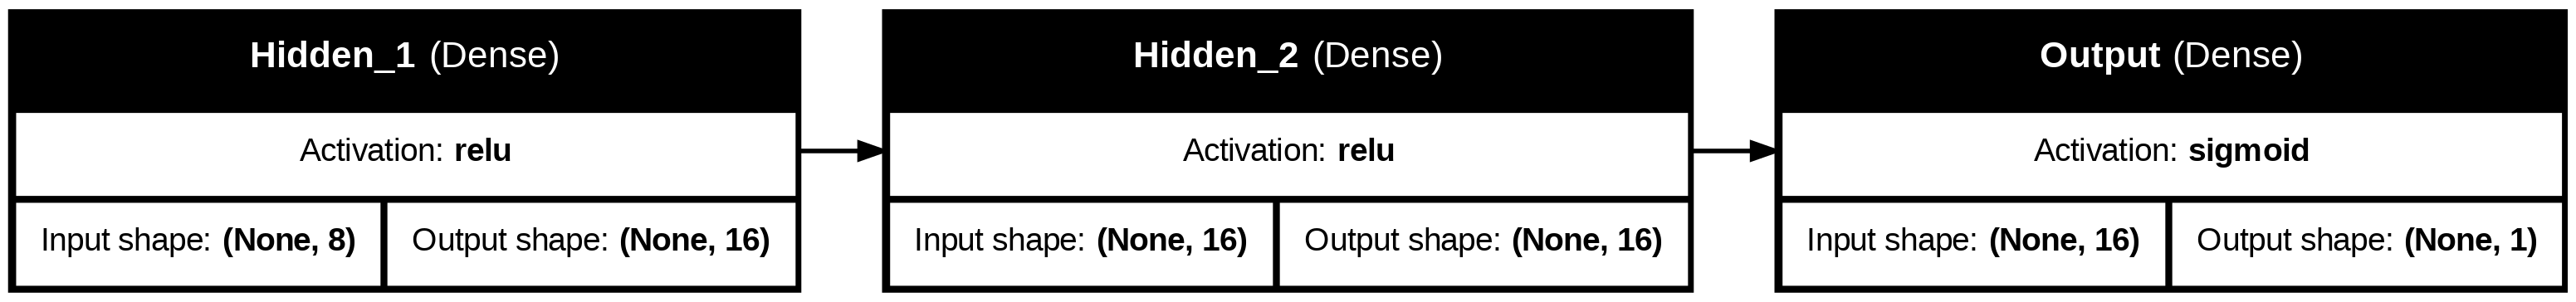

In [ ]:
# Using plot_model keras utility function to visualize the model i.e visualizing model_1
plot_model(model_1, show_layer_names = True, show_shapes = True, show_layer_activations = True, rankdir = "LR", dpi = 200)

In [ ]:
# Now fitting the model
model_1.fit(X_train, y_train,
            validation_data = (X_valid, y_valid),
            batch_size = 16,
            epochs = 20,
            verbose = 1)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6229 - loss: 2.4490 - val_accuracy: 0.6753 - val_loss: 0.8657
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6077 - loss: 1.0007 - val_accuracy: 0.6623 - val_loss: 0.8405
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6048 - loss: 1.1020 - val_accuracy: 0.6948 - val_loss: 0.7891
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6428 - loss: 0.8619 - val_accuracy: 0.7013 - val_loss: 0.6834
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6358 - loss: 0.8460 - val_accuracy: 0.6299 - val_loss: 0.6652
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6157 - loss: 0.8632 - val_accuracy: 0.7013 - val_loss: 0.6526
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6020 - loss: 0.8431 - val_accuracy: 0.6818 - val_loss: 0.7250
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5956 - loss: 0.7677 - val_accuracy: 0.6364 - val_loss:

# Using StandardScaler to scale our data

In [ ]:
X.shape, y.shape

((768, 8), (768,))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
data = np.hstack((X_scaled, np.reshape(y, (-1, 1))))
print(data.shape)
print(df.columns)

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
transformed_df = pd.DataFrame(data, columns = df.columns)
transformed_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0


In [ ]:
len(transformed_df[transformed_df["Outcome"] == 1]), len(transformed_df[transformed_df["Outcome"] == 0])

(268, 500)

In [ ]:
# Here in the above single line of code we can see that the samples of diabetes patient is 268 compared to 500 of non-diabetes patient.
# So, here we use RandomOverSampler

# Using RandomOverSampler on our scaled data

In [ ]:
over = RandomOverSampler()
X_final, y_final = over.fit_resample(X_scaled, y)
data = np.hstack((X_scaled, np.reshape(y, (-1, 1))))
final_df = pd.DataFrame(data, columns = df.columns)

In [ ]:
len(final_df[final_df["Outcome"] == 1]), len(final_df[final_df["Outcome"] == 0])

(500, 500)

# Creating our second NN model

In [ ]:
# Creating training, testing and validation dataset.
X_train, X_temp, y_train, y_temp = train_test_split(X_final, y_final, test_size = 0.4, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 0)

In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.Input(shape = (8,), name = "Input"),
    tf.keras.layers.Dense(16, activation = "relu", name = "Hidden1"),
    tf.keras.layers.Dense(16, activation = "relu", name = "Hidden2"),
    tf.keras.layers.Dense(1,  activation = "sigmoid", name = "Output")
])

# Now compiling our model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fitting model_2
model_2.fit(X_train, y_train,
            validation_data = (X_valid, y_valid),
            batch_size = 16,
            epochs = 50,
            verbose = 1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4573 - loss: 0.7147 - val_accuracy: 0.6700 - val_loss: 0.6528
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6932 - loss: 0.6393 - val_accuracy: 0.7250 - val_loss: 0.6043
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7229 - loss: 0.6035 - val_accuracy: 0.7500 - val_loss: 0.5634
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7485 - loss: 0.5572 - val_accuracy: 0.7500 - val_loss: 0.5314
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7530 - loss: 0.5213 - val_accuracy: 0.7500 - val_loss: 0.5141
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 0.5287 - val_accuracy: 0.7400 - val_loss: 0.5044
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7874 - loss: 0.4594 - val_accuracy: 0.7550 - val_loss: 0.5002
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7596 - loss: 0.5017 - val_accuracy: 0.7650 - val_loss:

In [ ]:
# Evaluating our model_2 using test dataset.
model_2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8187 - loss: 0.4112 


[0.4385722875595093, 0.8050000071525574]